Many problems in astrophysics give rise to data with multiple modes. This is typically because different processes physical processes contribute to the observed dataset.

For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarions include the evolution of isolated binaries in the galactic field and the dynamica assembly of sources in dense environments like globular clusters.

Some events form in different astrophysical environments than others. You want to figure out how many of formation channels are at play.

The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of N gaussians each with mean $\mu_i$ and standard deviation $/sigma_i$ and weight $/alpha_i$:
                
$p(x_i|\theta) = \sum_{j=1}^N \alpha_j N(\mu_j, \sigma_j)$

This depends on $3N-1$ parameters (not $3N$ because the sum of the $/alpha_i$ must be unity to ensure that this is a probability)

Tasks
- Load this file (np.load) and complete a quick exploration of the data. How many modes do you think you see?

- We'll use sklearn.mixture.GaussianMixture. You first need to define the model (instance of a class), and then train it on the data using the fit method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

Note. We'll do a more formal introduction to scikit-learn in one of the next lectures. Today's exercise is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens all the time in research...

- Complete the fit 10 times with $N = 1, ..., 10$ Gaussians.

Note: sklearn by default will use the so-called Expectation-Maximization algorithm, which is one of the many great things in data science we don't have time to study in this class.

- For each of this fits, compute the AIC (easy! It's an attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

- Plot the preferred solution on top of the input data. You should get a very nice fit!

- Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset.

Hint: Useful methods here are score_samples and predict_proba.

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as skGaussianMix

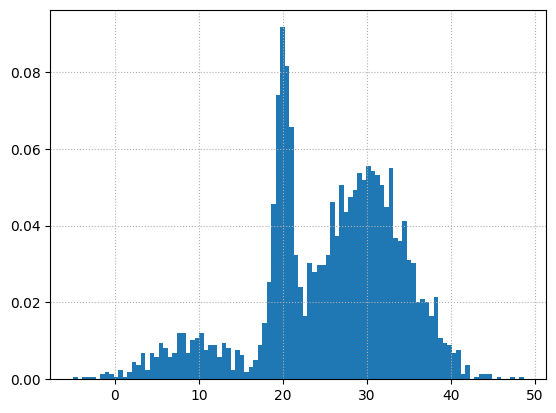

In [226]:
# Import data
path = "/home/alessia_pozzi/Astrostatistic/6_Frequentist/formationchannels.npy"
data = np.load(path)

plt.hist(data, bins=100, density=True)
plt.grid(linestyle=':')
plt.show()

In [227]:
# Fit with Gaussian Mixture Model
model = skGaussianMix(n_components=3)
model.fit(data)

AIC = model.aic(data)
print(AIC)

20083.07894669639


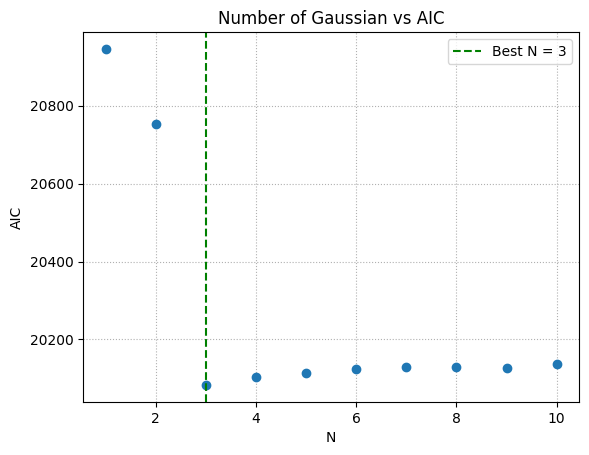

In [228]:
# Complete the fit 10 times with N = 1, ..., 10
N = 10
n_components = np.arange(1, N+1)
AIC = np.array([])

for n in n_components:
    model = skGaussianMix(n_components=n)
    model.fit(data)
    AIC = np.append(AIC, model.aic(data))

best_n = n_components[np.argmin(AIC)]

plt.plot(n_components, AIC, marker='o', linestyle=' ')
plt.axvline(best_n, linestyle='--', color='g', label=f'Best N = {best_n}')
plt.title("Number of Gaussian vs AIC")
plt.xlabel("N")
plt.ylabel("AIC")
plt.grid(linestyle=':')
plt.legend()
plt.show()

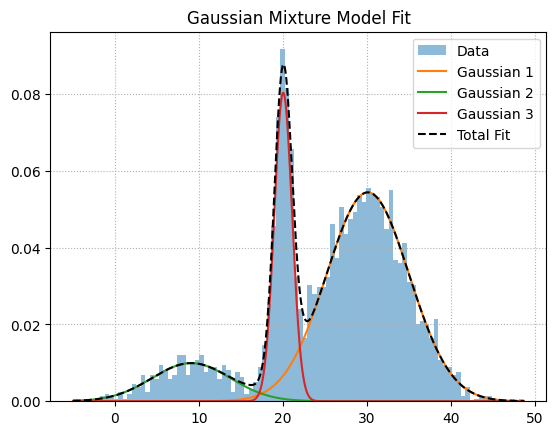

In [229]:
# Plot the solution with 3 gaussian on the top of input data

best_model = skGaussianMix(n_components=best_n)
best_model.fit(data)

# Compute the x axis
x = np.linspace(min(data), max(data), 500).reshape(-1, 1)

# Calculate the total pdf
pdf = np.exp(best_model.score_samples(x))

# Calculate the probability of each x point to a specific gaussian
responsibilities = best_model.predict_proba(x)

# Plot
# Data histogram
plt.hist(data, bins=100, density=True, alpha=0.5, label='Data')
# Single gaussian
for i in range(best_n):
    gaussian = responsibilities[:, i] * pdf
    plt.plot(x, gaussian, label=f'Gaussian {i+1}')
# Total pdf
plt.plot(x, pdf, linestyle='--', color='k', label='Total Fit')

plt.legend()
plt.grid(linestyle=':')
plt.title("Gaussian Mixture Model Fit")
plt.show()